In [5]:
import pandas as pd
import numpy as np
from decimal import Decimal

In [6]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) * 2
z = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) * 3
a = (x, y, z)

X, Y, Z = np.meshgrid(*a)

In [7]:
df = pd.DataFrame({'x': x, 'y': y, 'z': z})
df['x'][: 5].values

array([1, 2, 3, 4, 5])

MAE: 330.9097116702677
RMSE: 393.93626736764344
Equation: y = -1167.80 + 59.95x1 + 59.25x2


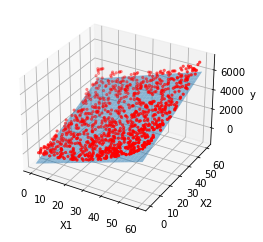

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

from mpl_toolkits.mplot3d import Axes3D

X_train = np.random.rand(2000).reshape(1000,2)*60
y_train = (X_train[:, 0]**2)+(X_train[:, 1]**2)
X_test = np.random.rand(200).reshape(100,2)*60
y_test = (X_test[:, 0]**2)+(X_test[:, 1]**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

coefs = model.coef_
intercept = model.intercept_
xs = np.tile(np.arange(61), (61,1))
ys = np.tile(np.arange(61), (61,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],
                                                          coefs[1]))

ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()

In [7]:
import pint
from static_values._equipments import PIPES 
from templates._units import quantity as Q

In [11]:
PIPES[0]['DIAMETER_RANGE'][1]

300 <Unit('millimeter')>

In [17]:
PIPES.sort(key=lambda pipe: pipe['DIAMETER_RANGE'][1], reverse=True)
PIPES[0]


{'MATERIAL': 'PVDF',
 'DIAMETER_RANGE': (16 <Unit('millimeter')>, 300 <Unit('millimeter')>),
 'PRICE_PER_LENGTH': 4 <Unit('usd / meter')>}